In [8]:
%config InlineBackend.figure_formats = ['svg']
import pandas as pd
import seaborn as sns
from glob import glob
sns.set_theme(style="ticks", font="Linux Biolinum O", font_scale=1.2)

frames = [pd.read_csv(data) for data in glob('../churn-repair_*.csv')]
data = pd.concat(frames, ignore_index=True)

def classify(r):
    if r['fragment_k'] == 1:
        return "Kademlia"
    else:
        cache = int(r['cache_sec']) // 3600
        return "Entropy$_{" + str(cache) + "}$"

data['Protocol'] = data.apply(classify, axis=1)
data = data[data['churn_rate'] >= 1.]
data

,churn_rate,node_count,duration,faulty_rate,object_count,chunk_n,chunk_k,fragment_n,fragment_k,cache_sec,targeted_count,data_lost,targeted,repair,alive_count,Protocol
43,1.0,100000,315360000,0,1,100,100,3,1,4294967295,0,0,0,29.860000,3,Kademlia
44,1.0,100000,315360000,0,1,10,8,80,32,0,0,0,0,1195.250000,80,Entropy$_{0}$
45,1.0,100000,315360000,0,1,10,8,80,32,172800,0,0,0,737.621094,80,Entropy$_{48}$
46,1.0,100000,315360000,0,1,10,8,80,32,43200,0,0,0,1034.414062,80,Entropy$_{12}$
47,1.0,100000,315360000,0,1,10,8,80,32,43200,0,0,0,1042.566406,80,Entropy$_{12}$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,7.0,100000,315360000,0,1,10,8,80,32,172800,0,0,0,513.175781,80,Entropy$_{48}$
536,7.0,100000,315360000,0,1,10,8,80,32,172800,0,0,0,518.371094,80,Entropy$_{48}$
537,7.0,100000,315360000,0,1,10,8,80,32,86400,0,0,0,1658.816406,80,Entropy$_{24}$
538,7.0,100000,315360000,0,1,10,8,80,32,21600,0,0,0,4986.726562,80,Entropy$_{6}$


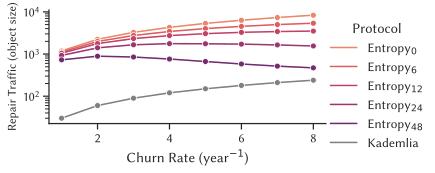

In [9]:
palette = sns.color_palette('flare', n_colors=5)
sns.relplot(data=data, 
    kind="line",
    x="churn_rate", y="repair", hue="Protocol", 
    hue_order=["Entropy$_{0}$", "Entropy$_{6}$", "Entropy$_{12}$", "Entropy$_{24}$", "Entropy$_{48}$", "Kademlia"],
    marker="o", palette=[*palette, 'gray'],
    height=2.56, aspect=2.) \
.set_xlabels("Churn Rate (year$^{-1}$)") \
.set_ylabels("Repair Traffic (object size)", fontdict={"size": "small"}) \
.set(yscale="log")